In [2]:
%load_ext autoreload
%autoreload 2

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import eleanor
import lightkurve as lk
from astropy.wcs import WCS

In [32]:
star = eleanor.Source(tic=120362128, sector=14, tc=True)
star.premade = False
sc = lk.search_targetpixelfile(target='tic120362128', sector=14).download()
sq = sc.quality < 5000
start = 2500
end = 3400
time = sc.time[sq][start:end].value
tpfs = sc.flux[sq][start:end].value
errs = sc.flux_err[sq][start:end].value
bkgs = sc.flux_bkg[sq,0,0][start:end].value
bkg0 = np.mean(bkgs)
data = eleanor.TargetData(
    star, 
    height=13, 
    width=13, 
    do_pca=True, 
    do_psf=False,
    time_arr=time, 
    data_arr=tpfs, 
    err_arr=errs, 
    bkg_arr=bkgs, 
)

In [50]:
photometry_flux = sc.to_lightcurve().flux[sq][start:end]
data.psf_lightcurve(flux_arr=photometry_flux.value, model_name='Gaussian', bkg_mag_cutoff=10, verbose=True)

256013332206.54718
256013332261.57053
256013333049.7159
256013332206.54718
256013331733.23993
256013332429.79346
256013331919.84177
256013331978.00162
256013332196.32587
256013332313.0507
256013332391.45447
256013332495.81693
256013332147.03784
256013331899.17007
256013332733.4917
256013332605.43896
256013332513.48538
256013332161.1288
256013332511.70718
256013332420.2551
256013332400.37677
256013332349.9887
256013332173.18915
256013332429.57498
256013331786.3455
256013332279.47888
256013332423.77292
256013332217.95837
256013331757.74048
256013332111.31287
256013332185.8138
256013332825.92963
256013332283.05942
256013332280.49176
256013332663.91663
256013332276.32004
256013332411.99808
256013332406.31708
256013332185.58203
256013332508.48398
256013332454.17664
256013332260.90698
256013332387.36932
256013331888.53012
256013332325.04266
256013331598.2539
256013331919.45367
256013332267.4979
256013332109.102
256013331759.5873
256013332313.88394
256013331717.6821
256013331915.95386
2560133

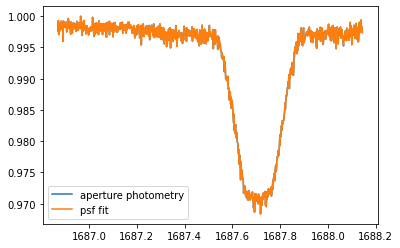

In [51]:
plt.plot(time, photometry_flux / np.max(photometry_flux), label='aperture photometry')
plt.plot(time, data.psf_flux[:end-start] / np.max(data.psf_flux[:end-start]), label='psf fit')
plt.legend()
plt.show()

In [52]:
data.arma_res

 final_simplex: (array([[-3.35536782e-05, -8.90288990e-06,  1.00254000e+00,
         2.53459481e-04,  1.50861278e-05],
       [-3.34709949e-05, -8.88337382e-06,  1.00253724e+00,
         2.53453898e-04,  1.50621080e-05],
       [-3.34481502e-05, -8.86864903e-06,  1.00253865e+00,
         2.53430681e-04,  1.50395306e-05],
       [-3.34602638e-05, -8.85054075e-06,  1.00253419e+00,
         2.53444348e-04,  1.50497832e-05],
       [-3.33755019e-05, -8.76809273e-06,  1.00255326e+00,
         2.53385404e-04,  1.49856321e-05],
       [-3.34094316e-05, -8.85808835e-06,  1.00253943e+00,
         2.53451837e-04,  1.50048905e-05]]), array([2.56013331e+11, 2.56013331e+11, 2.56013331e+11, 2.56013331e+11,
       2.56013331e+11, 2.56013331e+11]))
           fun: 256013331310.1691
       message: 'Optimization terminated successfully.'
          nfev: 135
           nit: 57
        status: 0
       success: True
             x: array([-3.35536782e-05, -8.90288990e-06,  1.00254000e+00,  2.53459481e-04

In [27]:
q = eleanor.mast.gaia_sources_in_tpf(star, 10, [11, 11])

In [30]:
star.coords

[284.926069422759, 36.551035172622]

In [28]:
q.columns

Index(['RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx',
       'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'FG', 'e_FG',
       'Gmag', 'e_Gmag', 'FBP', 'e_FBP', 'BPmag', 'e_BPmag', 'FRP', 'e_FRP',
       'RPmag', 'e_RPmag', 'BP-RP', 'RV', 'e_RV', 'Teff', 'AG', 'E_BP-RP_',
       'Rad', 'Lum', 'coords_x', 'coords_y'],
      dtype='object')

In [29]:
q.Source

213    2093003465318998272
257    2093003671477427584
270    2093003675779400960
Name: Source, dtype: int64